# Consultas no data set do Titanic
##  Primeiro, farei algumas alterações na base de dados para depois fazer a extração de informações

In [1]:
import pandas as pd

df_titanic = pd.read_csv("data.csv")

In [2]:
print(df_titanic.info())
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


##  Removendo linhas duplicadas na base de dados 

In [3]:
df_titanic.drop_duplicates(keep='last', inplace=True )

## Alterando generos para letras maiusculas, e o tipo da idade para Int

In [4]:
df_titanic['Sex'] = df_titanic['Sex'].str.upper()
df_titanic['Age'] = df_titanic['Age'].astype(int)

print(df_titanic.dtypes)
df_titanic.head(2)

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                          int32
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,MALE,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,FEMALE,38,1,0,71.2833


## Criando uma nova coluna a partir da soma das colunas 'Siblings' e 'Parents'

In [5]:
df_titanic['n_relatives'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard']

df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,n_relatives
0,0,3,Mr. Owen Harris Braund,MALE,22,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,FEMALE,38,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,FEMALE,26,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,FEMALE,35,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,MALE,35,0,0,8.0500,0


## Criando nova coluna para classificar as faixas etaria, como: criança, adolecente, adulto e idoso

In [6]:
idade_min = df_titanic['Age'].min()
idade_max = df_titanic['Age'].max()

intervalos = [idade_min-1, 10, 18, 65, idade_max]
rotulos = ['criança', 'adolecente', 'adulto', 'idoso']

df_titanic['faixa_idade'] = pd.cut(x = df_titanic['Age'], bins= intervalos, labels= rotulos )


print(df_titanic.info())
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 886
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    object  
 3   Sex                      887 non-null    object  
 4   Age                      887 non-null    int32   
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children Aboard  887 non-null    int64   
 7   Fare                     887 non-null    float64 
 8   n_relatives              887 non-null    int64   
 9   faixa_idade              887 non-null    category
dtypes: category(1), float64(1), int32(1), int64(5), object(2)
memory usage: 66.9+ KB
None


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,n_relatives,faixa_idade
0,0,3,Mr. Owen Harris Braund,MALE,22,1,0,7.2500,1,adulto
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,FEMALE,38,1,0,71.2833,1,adulto
2,1,3,Miss. Laina Heikkinen,FEMALE,26,0,0,7.9250,0,adulto
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,FEMALE,35,1,0,53.1000,1,adulto
4,0,3,Mr. William Henry Allen,MALE,35,0,0,8.0500,0,adulto


##  Obtendo a contagem de registros, a quantidade de valores únicos e o valor que mais se repete

In [7]:
df_titanic['faixa_idade'].describe()

count        887
unique         4
top       adulto
freq         711
Name: faixa_idade, dtype: object

## Obtendo a frequência de cada categoria

In [8]:
pd.Categorical(df_titanic['faixa_idade']).describe()

,counts,freqs
categories,,
criança,73,0.082300
adolecente,93,0.104848
adulto,711,0.801578
idoso,10,0.011274


In [9]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,n_relatives,faixa_idade
0,0,3,Mr. Owen Harris Braund,MALE,22,1,0,7.2500,1,adulto
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,FEMALE,38,1,0,71.2833,1,adulto
2,1,3,Miss. Laina Heikkinen,FEMALE,26,0,0,7.9250,0,adulto
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,FEMALE,35,1,0,53.1000,1,adulto
4,0,3,Mr. William Henry Allen,MALE,35,0,0,8.0500,0,adulto


## Removendo colunas que não serão mais necessarias

In [10]:
df_titanic.drop(columns= ['Siblings/Spouses Aboard', 'Parents/Children Aboard'], inplace=True)

df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare,n_relatives,faixa_idade
0,0,3,Mr. Owen Harris Braund,MALE,22,7.2500,1,adulto
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,FEMALE,38,71.2833,1,adulto
2,1,3,Miss. Laina Heikkinen,FEMALE,26,7.9250,0,adulto
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,FEMALE,35,53.1000,1,adulto
4,0,3,Mr. William Henry Allen,MALE,35,8.0500,0,adulto


# Extração de informações

## Perguntas que serão respondidas:

* #### Quantas classes distintas (PClass) existem?
* #### Qual a quantidade de sobreviventes e não sobreviventes?
* #### Quantos idosos estavam a bordo e quantos sobreviveram?
* #### Das pessoas que sobreviveram, qual a taxa de sobrevivência entre homens e mulheres?
* #### Qual foi o valor médio da passagem entre os que sobreviveram e os que não sobreviveram?

In [11]:
#Quantas classes distintas (PClass) existem?
classes = sorted(list(df_titanic['Pclass'].unique()))

print(f'Classes distintas = {classes}')


Classes distintas = [1, 2, 3]


In [12]:
#Qual a quantidade de sobreviventes e não sobreviventes?
filtro_sobreviventes = df_titanic['Survived'] == 1
filtro_nao_sobreviventes = df_titanic['Survived'] == 0

qtde_sobreviventes = df_titanic.loc[filtro_sobreviventes].shape[0]
qtde_nao_sobreviventes = df_titanic.loc[filtro_nao_sobreviventes].shape[0]

print(f'Quantidade de sobreiventes = {qtde_sobreviventes}')
print(f'Quantidade de não sobreiventes = {qtde_nao_sobreviventes}')


Quantidade de sobreiventes = 342
Quantidade de não sobreiventes = 545


In [13]:
#Quantos idosos estavam a bordo e quantos sobreviveram?
filtro_idosos = df_titanic['faixa_idade'] == 'idoso'

qtde_idosos = df_titanic.loc[filtro_idosos].shape[0]
qtde_idosos_sobreviventes= df_titanic.loc[(filtro_idosos) & (filtro_sobreviventes)].shape[0]

print(f'Quantidade de idosos a bordo = {qtde_idosos}')
print(f'Quantidade de idosos que sobreviveram = {qtde_idosos_sobreviventes}')

Quantidade de idosos a bordo = 10
Quantidade de idosos que sobreviveram = 1


In [14]:
#Das pessoas que sobreviveram, qual a taxa de sobrevivência entre homens e mulheres?
filtro_homens = df_titanic['Sex'] == 'MALE'
filtro_mulheres = df_titanic['Sex'] == 'FEMALE'

qtde_homens_sobreviventes = df_titanic.loc[(filtro_homens) & (filtro_sobreviventes)].shape[0]
qtde_mulheres_sobreviventes = df_titanic.loc[(filtro_mulheres) & (filtro_sobreviventes)].shape[0]

#Para calcular a taxa de sobreviventes, é necessário o valor total de sobreviventes
qtde_total_sobreviventes = df_titanic.loc[filtro_sobreviventes].shape[0]

taxa_homens = qtde_homens_sobreviventes * 100 /qtde_total_sobreviventes
taxa_mulheres = qtde_mulheres_sobreviventes * 100 /qtde_total_sobreviventes

print('Taxa de sobreviventes homens = {:.1f} %'.format(taxa_homens))
print('Taxa de sobreviventes mulheres = {:.1f} %'.format(taxa_mulheres))

Taxa de sobreviventes homens = 31.9 %
Taxa de sobreviventes mulheres = 68.1 %


In [15]:
#Qual foi o valor médio da passagem entre os que sobreviveram e os que não sobreviveram?
valor_medio_sobreviventes = df_titanic.loc[filtro_sobreviventes, 'Fare'].mean()
valor_medio_nao_sobreviventes = df_titanic.loc[filtro_nao_sobreviventes, 'Fare'].mean()

print('Valor médio das passagens dos sobreviventes = ${:.2f}'.format(valor_medio_sobreviventes))
print('Valor médio das passagens dos não sobreviventes = ${:.2f}'.format(valor_medio_nao_sobreviventes))


Valor médio das passagens dos sobreviventes = $48.40
Valor médio das passagens dos não sobreviventes = $22.21


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

<AxesSubplot:xlabel='faixa_idade', ylabel='Survived'>

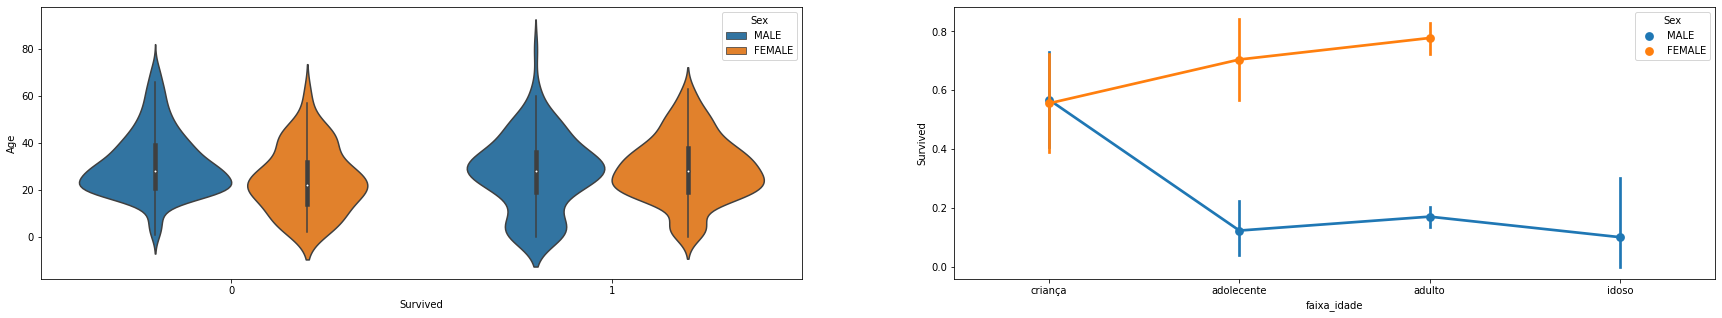

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(30,5))

sns.violinplot(x='Survived', y='Age', hue='Sex', data=df_titanic, ax=axs[0])
sns.pointplot(x='faixa_idade', y='Survived', hue='Sex', data=df_titanic, ax=axs[1])